In [42]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
!pip install hvplot
import hvplot as hv

In [43]:
%env HV_DOC_HTML=true

env: HV_DOC_HTML=true


In [44]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

KeyboardInterrupt: 

In [45]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


<Axes: xlabel='coin_id'>

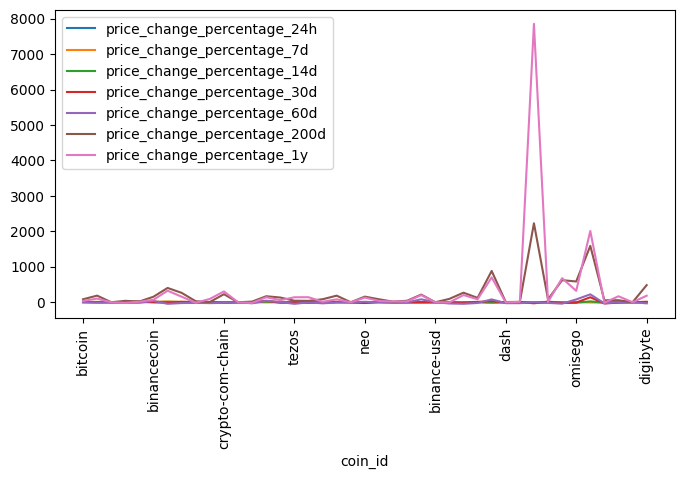

In [46]:
# Plot your data to see what's in your DataFrame
df_market_data.plot.line(
figsize=(8,4),
    rot=90
)

---

### Prepare the Data

In [47]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data)

In [48]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(market_data_scaled, columns =df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original data

# Set the coinid column as index


# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [49]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [50]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
  k_model = KMeans(n_clusters = i)
  k_model.fit(df_market_data_scaled)
  inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [51]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_1 = {"k": k, "inertia": inertia}
elbow_df_1 = pd.DataFrame(elbow_data_1)

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_1

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668
5,6,53.057788
6,7,43.828568
7,8,37.384252
8,9,32.768762
9,10,27.908427


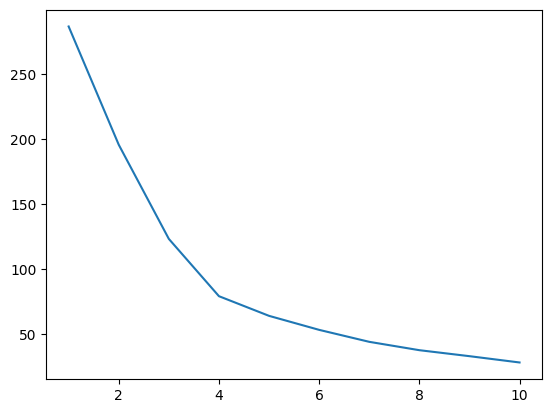

In [53]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_1 = plt.plot(elbow_df_1["k"], elbow_df_1['inertia'])
elbow_1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

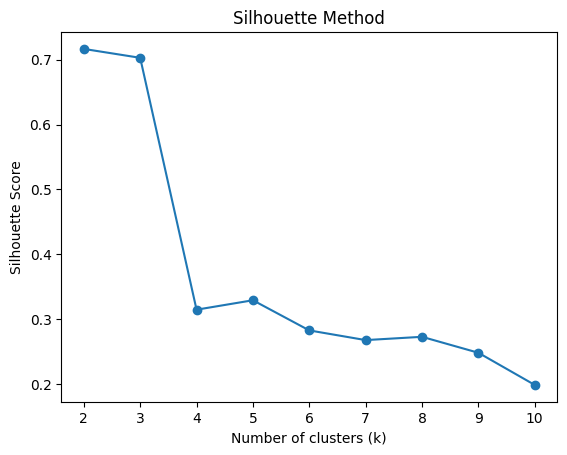

In [54]:
#from the elbow method visually we can see that 3 is the best number but I'd like to use math to confirm my assement
from sklearn.metrics import silhouette_score

k_values = list(range(2, 11))
silhouette_scores = []

for k in k_values:
    k_model = KMeans(n_clusters=k)
    k_labels = k_model.fit_predict(df_market_data_scaled)
    silhouette_avg = silhouette_score(df_market_data_scaled, k_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 3 is the best k value (the elbow plot shows that and i confirmed the result with silhouette method)

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [55]:
# Initialize the K-Means model using the best value for k
K_model = KMeans(n_clusters= 3)



In [56]:
# Fit the K-Means model using the scaled data
K_model.fit(df_market_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [57]:
# Predict the clusters to group the cryptocurrencies using the scaled data
K_pred = K_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
K_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int32)

In [58]:
# Create a copy of the DataFrame
K_df_market_data_scaled = df_market_data_scaled.copy()

In [59]:
# Add a new column to the DataFrame with the predicted clusters
K_df_market_data_scaled["K_predict"] = K_pred

# Display sample data
K_df_market_data_scaled.sample(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,K_predict
coin_id,,,,,,,,
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tezos,-0.151583,0.708196,0.258012,-0.602296,-0.956049,-0.449211,-0.168479,1
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,1
huobi-token,-0.052032,-0.457229,0.032522,-0.184489,-0.070809,-0.451982,-0.262140,1
neo,0.286546,-0.326301,-1.212670,-0.903134,0.290970,-0.181187,-0.175550,1


In [87]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
hv.extension('bokeh')
k_scatter_plot = K_df_market_data_scaled.hvplot.scatter(
  x="price_change_percentage_24h",
  y="price_change_percentage_7d",
  color = "K_predict",
  hover_cols=["coin_id"],
  cmap = "HighContrast"
)
k_scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,K_predict,coin_id)

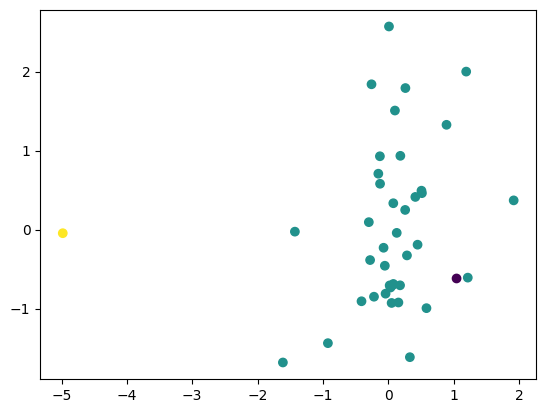

In [61]:
plt.scatter(K_df_market_data_scaled["price_change_percentage_24h"],K_df_market_data_scaled["price_change_percentage_7d"], c= K_df_market_data_scaled["K_predict"])
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [62]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components= 3)

In [63]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
pca_data = pca.fit_transform(df_market_data_scaled)
df_pca = pd.DataFrame(pca_data, columns = ["PCA1","PCA2","PCA3"])
# View the first five rows of the DataFrame.
df_pca.head()

,PCA1,PCA2,PCA3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [64]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [65]:
pca.explained_variance_ratio_.sum()


0.895031657030984

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** almost 0.9 or 90%

In [66]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
df_pca["coinid"] = df_market_data.index

# Set the coinid column as index
df_pca = df_pca.set_index("coinid")

# Display sample data
df_pca.sample(5)

,PCA1,PCA2,PCA3
coinid,,,
omisego,0.111675,0.428316,-1.205398
binance-usd,-0.450211,-0.151019,-0.647401
stellar,-0.489015,-0.732719,-0.062543
tezos,-0.796176,-0.494409,1.082812
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the PCA Data

In [67]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [68]:
# Create an empty list to store the inertia values
inertia = []
for i in k:
  model = KMeans(n_clusters=i)
  model.fit(df_pca)
  inertia.append(model.inertia_)

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [70]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve
elbow_data_2 = {"k": k, "inertia": inertia}
elbow_df_2 = pd.DataFrame(elbow_data_2)

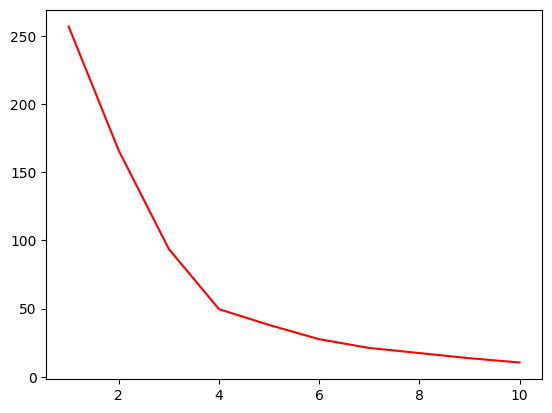

In [90]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_2 = plt.plot(elbow_df_2["k"], elbow_df_2['inertia'], color = "red")
elbow_2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

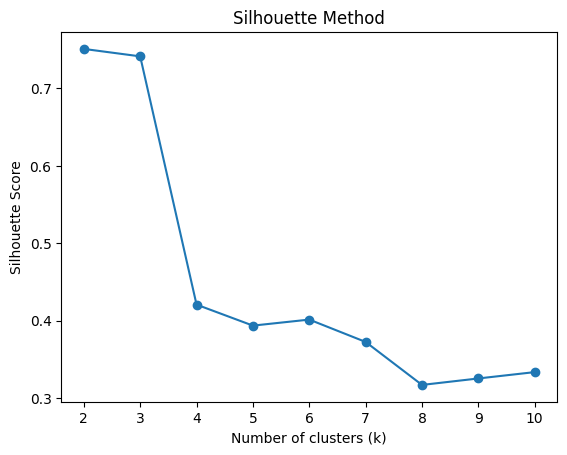

In [30]:
k_values = list(range(2, 11))
silhouette_scores = []

for k in k_values:
    k_model = KMeans(n_clusters=k)
    k_labels = k_model.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, k_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 3


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [72]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3)
model.fit(df_pca)
pred = model.predict(df_pca)
k_df_pca = df_pca.copy()
k_df_pca["KMeans"] = pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Fit the K-Means model using the PCA data

In [73]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int32)

In [74]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data
k_df_pca.sample(5)

,PCA1,PCA2,PCA3,KMeans
coinid,,,,
cardano,-0.345600,0.729439,1.478013,1
ripple,-0.471835,-0.222660,-0.479053,1
litecoin,-0.649468,0.432165,0.600303,1
stellar,-0.489015,-0.732719,-0.062543,1
ethereum,-0.458261,0.458466,0.952877,1


In [88]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
hv.extension('bokeh')
kpca_scatter_plot = k_df_pca.hvplot.scatter(
  x="PCA1",
  y="PCA2",
  color = "KMeans",
  hover_cols=["coin_id"],
  cmap = "Bokeh"
)
kpca_scatter_plot

:Scatter   [PCA1]   (PCA2,KMeans)

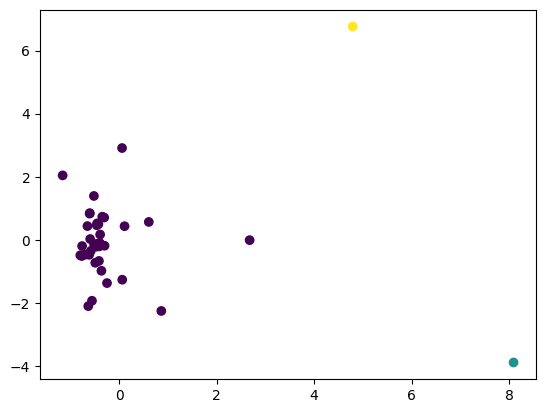

In [34]:
plt.scatter(k_df_pca["PCA1"],k_df_pca["PCA2"], c= k_df_pca["KMeans"])
plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

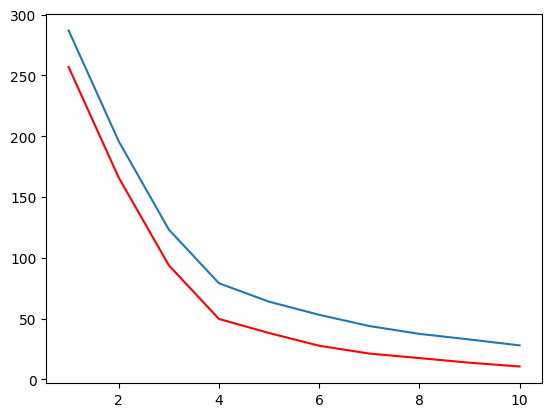

In [91]:
# Composite plot to contrast the Elbow curves
plt.plot(elbow_df_1["k"], elbow_df_1['inertia'], label='Elbow 1')


plt.plot(elbow_df_2["k"], elbow_df_2['inertia'], color='red', label='Elbow 2')
plt.show()

In [89]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
hv.extension('bokeh')
composite_plot = kpca_scatter_plot * k_scatter_plot
composite_plot

:Overlay
   .Scatter.I  :Scatter   [PCA1]   (PCA2,KMeans)
   .Scatter.II :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,K_predict,coin_id)

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** the cluster groups in pca chart are better grouped by/classified visually, compared to the clusters of the chart without pca and therfore you can identify outliers better. one of the clusters of first chart (the chart with more features, is within the other cluster (cluster zero and cluster 1)

In [ ]:
#DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.neighbors import NearestNeighbors

def estimate_eps_using_heuristic(data, k=4, percentile=5):
        nn_model = NearestNeighbors(n_neighbors=k)
        nn_model.fit(data)
        distances, _ = nn_model.kneighbors(data)
        eps = np.percentile(distances[:, -1], percentile)
    
        return eps
my_eps = (estimate_eps_using_heuristic(df_market_data_scaled))
dbscan = DBSCAN(eps =my_eps, min_samples = 4)
dbscan_pred = dbscan.fit_predict(market_data_scaled)
dbscan_df_market_data_scaled = df_market_data_scaled.copy()
dbscan_df_market_data_scaled["dbscan_pred"] = dbscan_pred
dbscan_df_market_data_scaled.sample(5)
hv.extension('bokeh')
dbscan_scatter_plot = dbscan_df_market_data_scaled.hvplot.scatter(
  x="price_change_percentage_24h",
  y="price_change_percentage_7d",
  color = "dbscan_pred",
  hover_cols=["coin_id"],
  cmap = "Bokeh"
)
dbscan_scatter_plot